In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lendo todo o banco de dados:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')

In [3]:
#Inserindo todos os dados da Aula12:
#Esse caso está substituindo os valores nulos por informações que são possíveis de rastrear depois:
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '01/01/2020'

#Formato das datas:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format = '%m/%d/%Y')

#Manipulando um valor específico de um produto, feito na Aula11:
#Manipulando o valor do produto 'xxx-231a' para chegar em um valor real:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000
dfProdutos
#Indexes feitos na Aula11:
dfClientes = dfClientes.set_index('id')
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')

#Joins feitos na Aula12:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on = 'id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on = 'id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on = 'id_produto')
df = df.join(dfPagamentos.set_index('id_venda'))

#Inserindo Colunas feitas na Aula13:
#Inserindo uma coluna para quando ouve algum pagamento, caso a data do pagamento('dt_pgto') for nula('NaT') será representada como 0 para não feita:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
#Inserindo mais uma coluna: Tempo de pagamento em dias:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
#Inserindo a coluna 'idade':
df['cliente_idade'] = np.floor((pd.to_datetime('today').normalize() - pd.to_datetime(df['cliente_dt_nasc'])).dt.days / 365.25)

#Dando print:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0


# Análise

In [5]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending = False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por Loja de cada Estado')

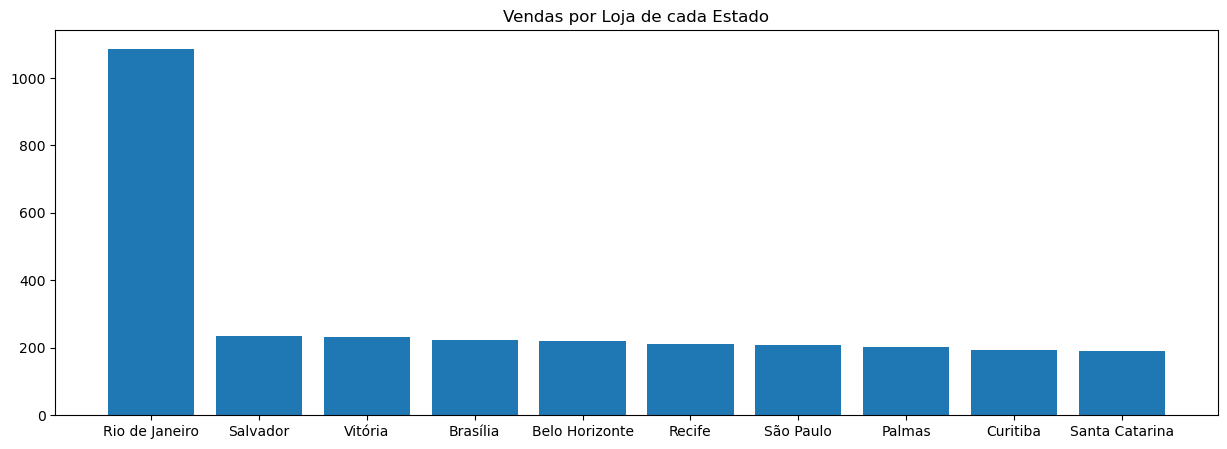

In [6]:
#Criando o gráfico, como sempre criando a imagem primeiro, visto que é o costumeiro:
plt.figure(figsize = (15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja de cada Estado')

In [7]:
#Produtos que mais vendem:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending = False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por Produto')

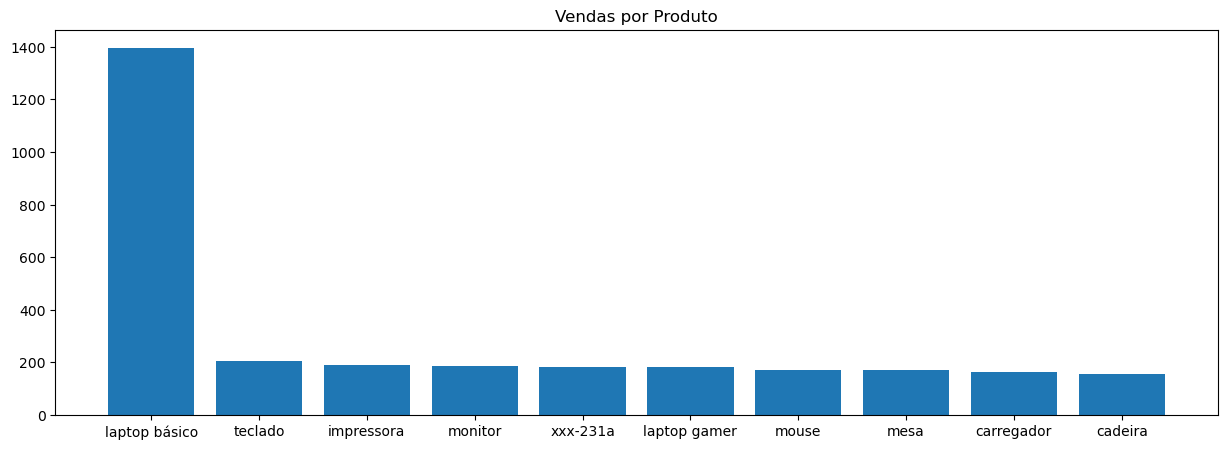

In [8]:
#Criando o gráfico, como sempre criando a imagem primeiro, visto que é o costumeiro:
plt.figure(figsize = (15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Produto')

## Receita por Loja

In [10]:
#Da primeira maneira tem um esforço computacional MUITO maior, visto que você faz os cálculos antes mesmo de filtrar, já no segundo caso é filtrado antes, mesmo tendo o
#mesmo resultado...
#'df.groupby('loja_cidade').count().produto_valor' == 'df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().sort_values(ascending = False)'


#pode ser inserido ao lado do ascending onde está localizado essa tabela, porém ele se torna uma DataFrame, dificultando para fazer em um gráfico de barras:
#"...(ascending = False, by = 'produto_valor')"
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending = False)
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por Loja')

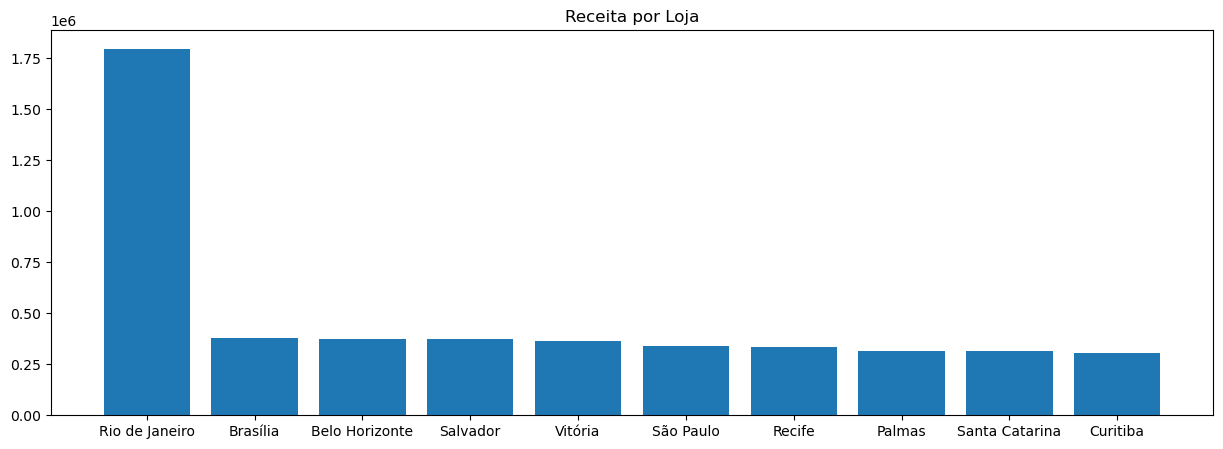

In [11]:
#Criando o gráfico, como sempre criando a imagem primeiro, visto que é o costumeiro:
plt.figure(figsize = (15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')

In [12]:
#Média:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i.' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados != graf_dados.max].mean(), graf_dados[graf_dados != graf_dados.max].mean()))
graf_dados.max()/graf_dados[graf_dados != graf_dados.max].mean()

O maior valor é 1797906, sendo 3.67 vezes a média dos demais, que é 489952.


3.6695524307419545

## Receita por Produto

In [14]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
graf_dados

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por Produto')

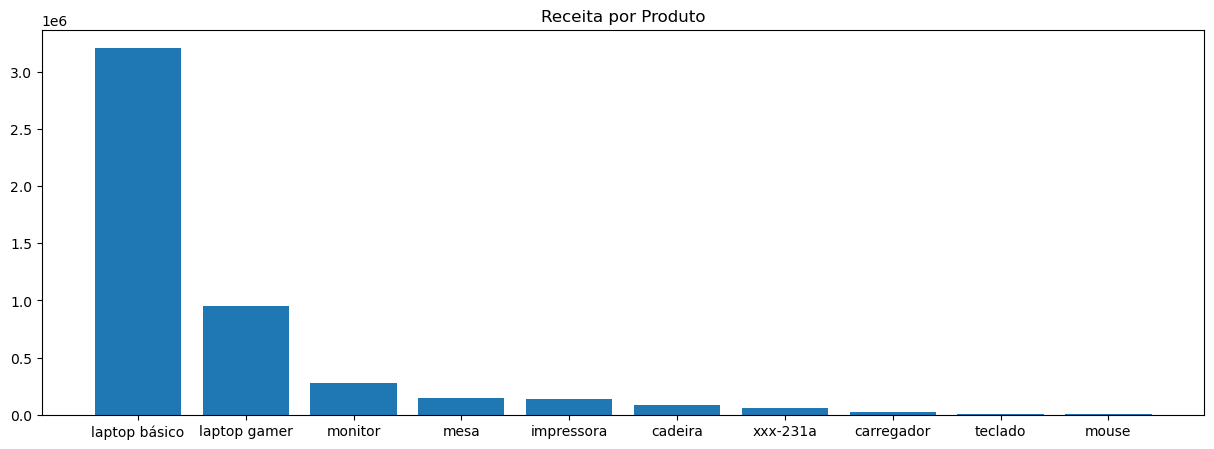

In [15]:
#Criando o gráfico, como sempre criando a imagem primeiro, visto que é o costumeiro:
plt.figure(figsize = (15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Produto')

## Subplots

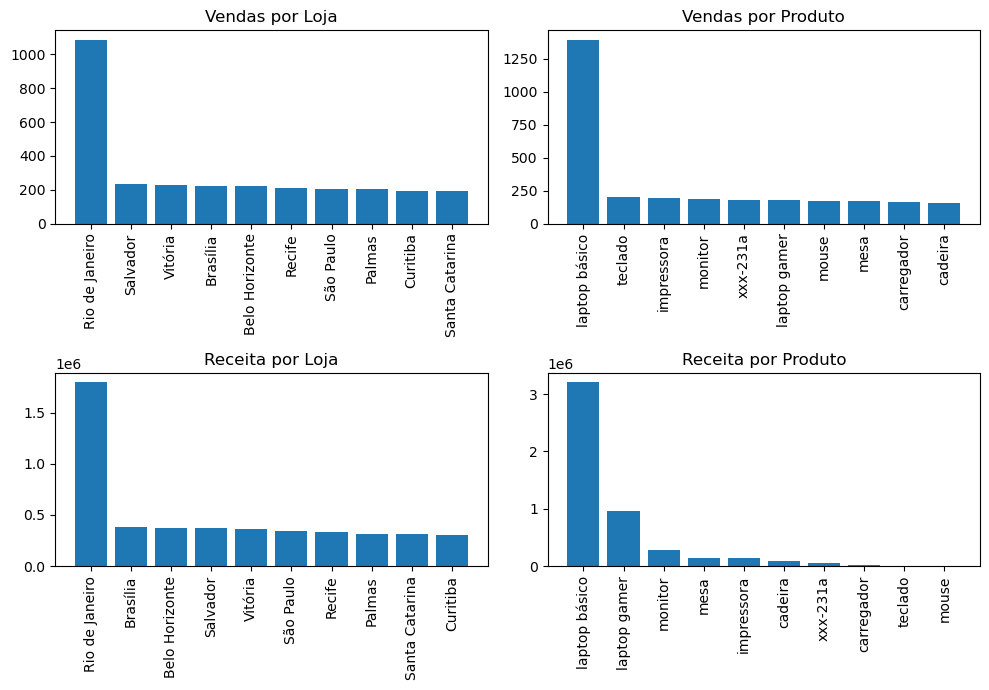

In [17]:
#Criando o gráfico, como sempre criando a imagem primeiro, visto que é o costumeiro:
#Vendas por Loja:
plt.figure(figsize = (10,7))
plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')
#Deixando os nomes da legenda do eixo x na vertical:
plt.xticks(rotation = 90)

#Vendas por Produto:
plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Produto')
plt.xticks(rotation = 90)

#Receita por Loja:
plt.subplot(2,2,3)
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')
plt.xticks(rotation = 90)

#Receita por Produto:
plt.subplot(2,2,4)
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Produto')
plt.xticks(rotation = 90)

#Houve uma sobre posição dos dois últimos títulos com os dois primeiros eixos, corrigindo com esse comando:
plt.tight_layout()

## Receita por Loja

In [19]:
graf_dados = df[['cliente_nome', 'produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending = False)
graf_dados

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

Text(0.5, 1.0, 'Receita por Cliente')

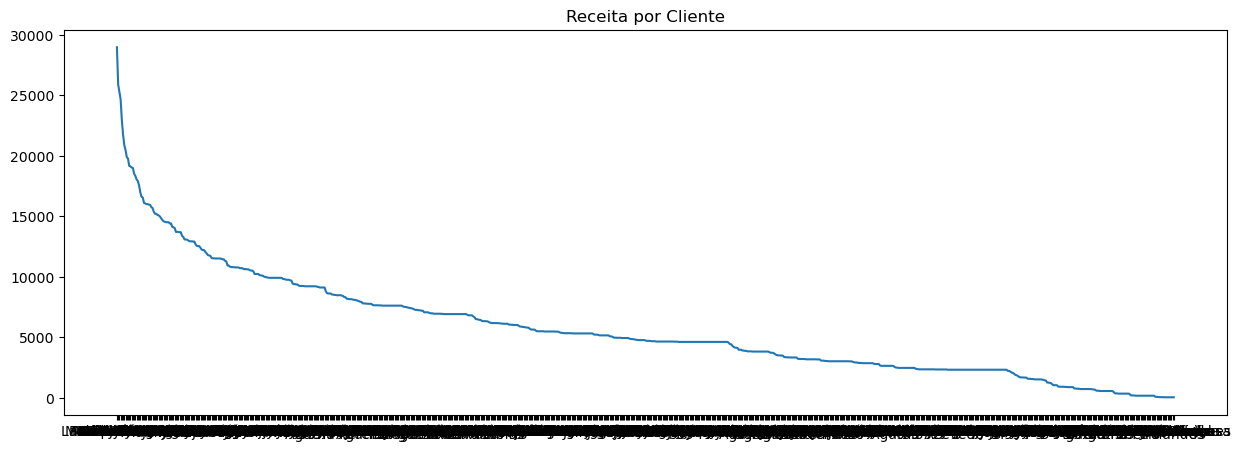

In [20]:
#Criando o gráfico, como sempre criando a imagem primeiro, visto que é o costumeiro:
plt.figure(figsize = (15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Receita por Cliente')

Text(0.5, 1.0, 'Receita por Cliente')

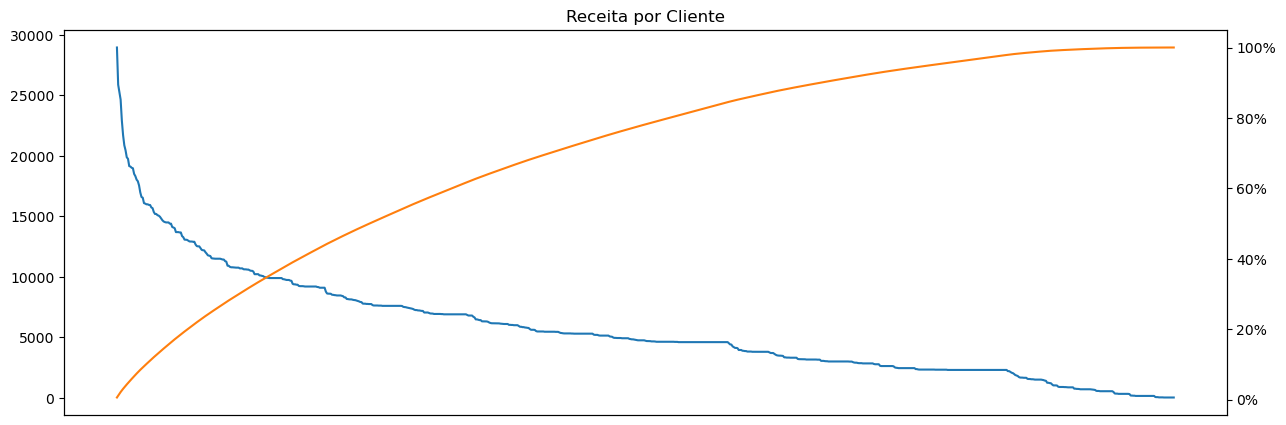

In [21]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(graf_dados.index, graf_dados.values, color = 'C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color = 'C1')
from matplotlib.ticker import PercentFormatter
ax2.yaxis.set_major_formatter(PercentFormatter())
#Limpando o eixo x, já que por enquanto não será necessário algo tão visual:
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

plt.title('Receita por Cliente')

In [22]:
#Verificando se a interpretação feita pelo gráfico está correta, de que mais de 60% da receita de toda a empresa é feica por menos de um terço de todos os clientes:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
porcentagem_clientes = receita_acumulada[receita_acumulada < 0.60].count()/receita_acumulada.count()
print("{:.2f}".format(porcentagem_clientes*100), "%")

31.71 %


## Pareto

Text(0.5, 1.0, 'Pareto de Receita por Produto')

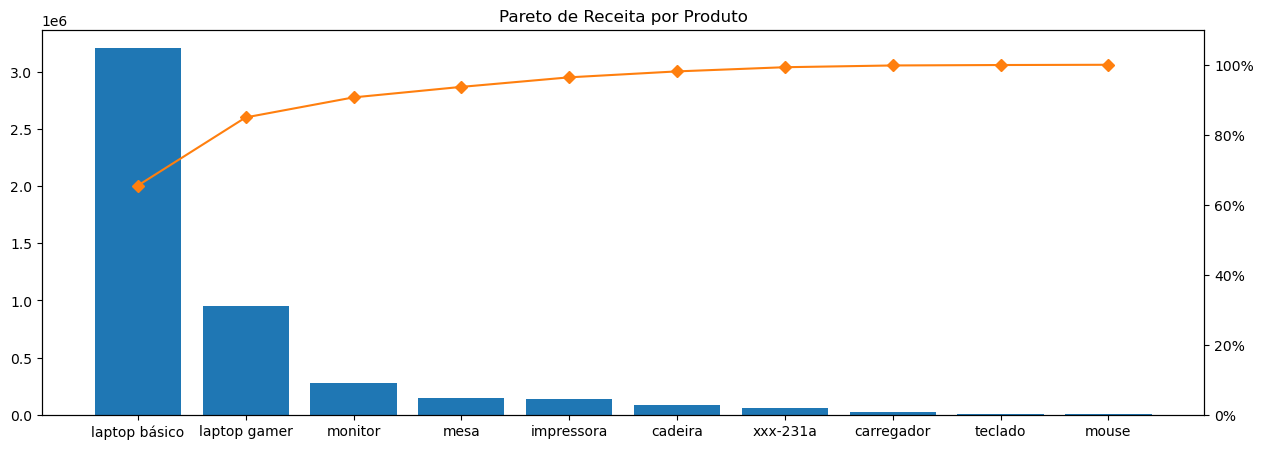

In [24]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
fig, ax = plt.subplots(figsize = (15,5))
ax.bar(graf_dados.index, graf_dados.values, color = 'C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color = 'C1', marker = 'D')
ax2.yaxis.set_major_formatter(PercentFormatter())
#Melhor visualização:
plt.ylim(0,110)
plt.title('Pareto de Receita por Produto')

## Receita Combianndo Produto-Loja

In [26]:
#Agora será utilizado laços de repetição ao invés de utilizar auxílios do pandas, mas sempre utilizar essas bibliotecas para um melhor desempenho:
#Maneira passada em aula
#graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
#for cidade in dfLojas.cidade:
#    for produto in dfProdutos.produto:
#        graf_dados = pd.concat([pd.DataFrame({
#            'Loja' : [cidade],
#            'Produto' : [produto],
#            'Receita' : [df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()]
#        }), graf_dados], ignore_index=True)
#graf_dados

lista_dados = []
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        receita = df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
        lista_dados.append({'loja': cidade, 'produto': produto, 'receita': receita})
        
graf_dados = pd.DataFrame(lista_dados)

graf_dados

,loja,produto,receita
0,São Paulo,mouse,300.0000
1,São Paulo,teclado,510.0000
2,São Paulo,laptop básico,223100.0000
3,São Paulo,laptop gamer,63600.0000
4,São Paulo,monitor,30000.0000
...,...,...,...
95,Vitória,impressora,8400.0000
96,Vitória,carregador,2100.0000
97,Vitória,cadeira,5400.0000
98,Vitória,mesa,12040.0000


<Axes: xlabel='produto', ylabel='loja'>

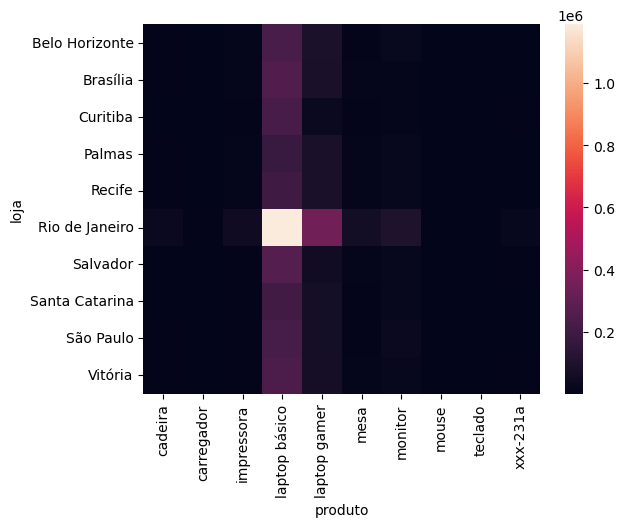

In [27]:
import seaborn as sns
graf_dados = graf_dados.pivot_table(index = 'loja', columns = 'produto', values = 'receita', aggfunc = 'sum')
sns.heatmap(graf_dados)
#Sendo possível ver que o laptop básico se destaca MUITO no Rio de Janeiro, mas também em todas as outras cidades, outro que se destaca bem é o laptop gamer...

In [28]:
lista_dados = []
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        receita = df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
        lista_dados.append({'loja': cidade, 'produto': produto, 'receita': receita})
        
graf_dados = pd.DataFrame(lista_dados)
graf_dados = graf_dados.sort_values(ascending = False, by = 'receita')
graf_dados

,loja,produto,receita
12,Rio de Janeiro,laptop básico,1189100.0
13,Rio de Janeiro,laptop gamer,344500.0
62,Salvador,laptop básico,264500.0
72,Brasília,laptop básico,250700.0
92,Vitória,laptop básico,241500.0
...,...,...,...
70,Brasília,mouse,220.0
60,Salvador,mouse,220.0
40,Santa Catarina,mouse,200.0
30,Belo Horizonte,mouse,200.0


In [29]:
graf_dados['loja_prod'] = graf_dados.loja + '-' + graf_dados.produto
graf_dados

,loja,produto,receita,loja_prod
12,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
13,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
62,Salvador,laptop básico,264500.0,Salvador-laptop básico
72,Brasília,laptop básico,250700.0,Brasília-laptop básico
92,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
70,Brasília,mouse,220.0,Brasília-mouse
60,Salvador,mouse,220.0,Salvador-mouse
40,Santa Catarina,mouse,200.0,Santa Catarina-mouse
30,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse


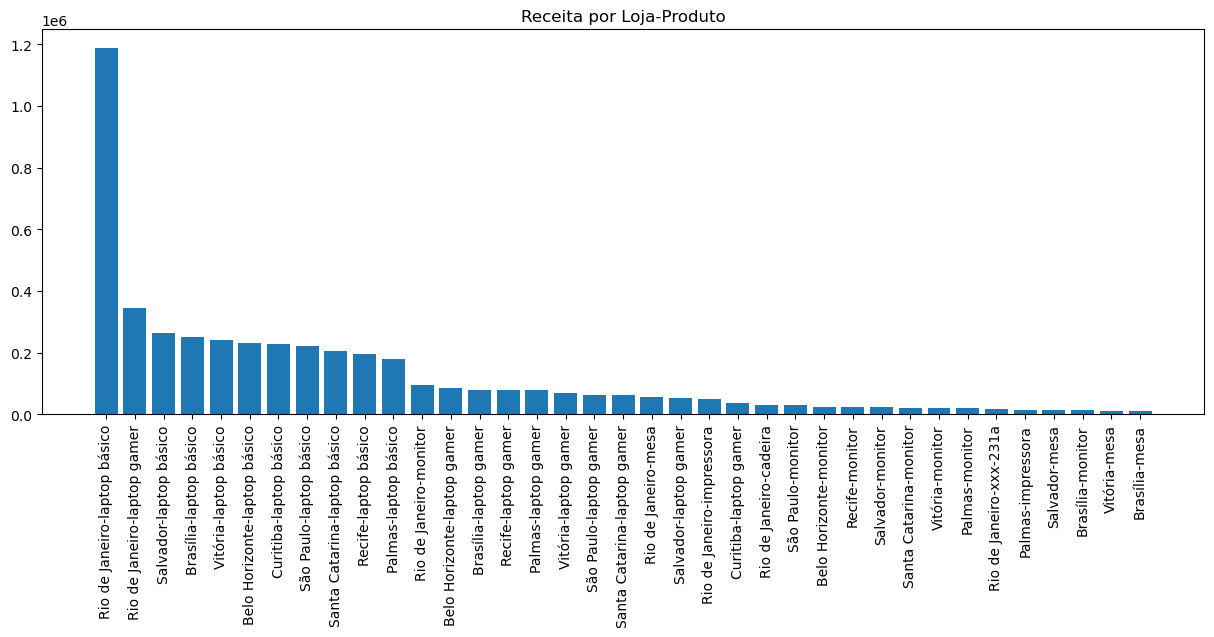

In [30]:
plt.figure(figsize = (15,5))
#Devido a grande quantidade de receitas, é possível filtrar elas por uma diferença de 1% de toda a receita total, só números mais relevantes...
plt.bar(graf_dados.loja_prod[graf_dados.receita > 0.01 * graf_dados.receita.max()], graf_dados.receita[graf_dados.receita > 0.01 * graf_dados.receita.max()])
plt.xticks(rotation = 90)
plt.title('Receita por Loja-Produto')
plt.show()

In [31]:
df.tempo_pg.mean()

22.47200772200772

Text(0.5, 1.0, 'Boxplot para tempo de pagamento')

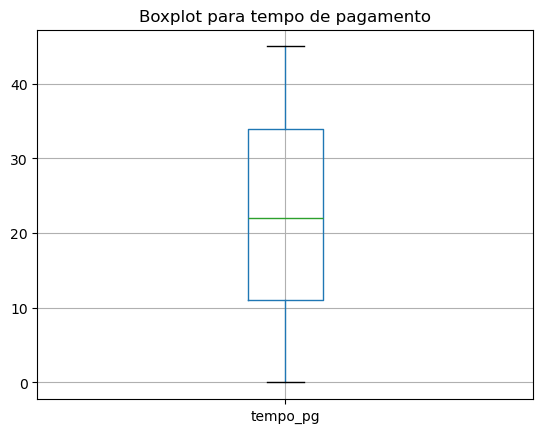

In [32]:
df.boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento')

Text(0.5, 1.0, 'Histograma para tempo de pagamento')

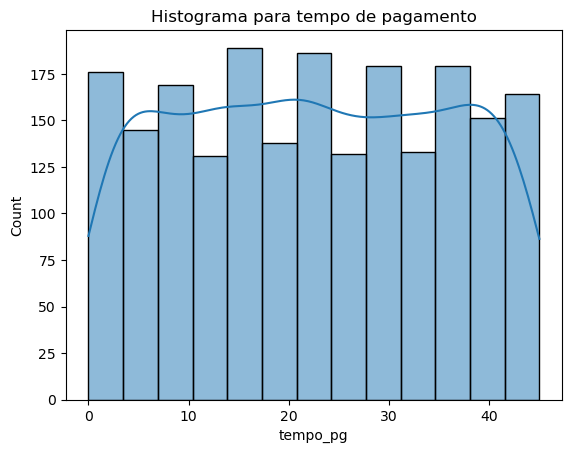

In [33]:
sns.histplot(data = df.tempo_pg, kde = True)
plt.title('Histograma para tempo de pagamento')
#É nítido que não possui uma variação precisa, no meio não é maior do que os outros, por isso seria necessário fazer mais histogramas, já que esse foi ruim...

In [34]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

## Tempo de Pagamento por Cidade e Produto

In [36]:
#Deu erro, mas mesmo se desse certo não seria o suficiente, por isso o comando de baixo...
#df.groupby('loja_cidade').mean().tempo_pg

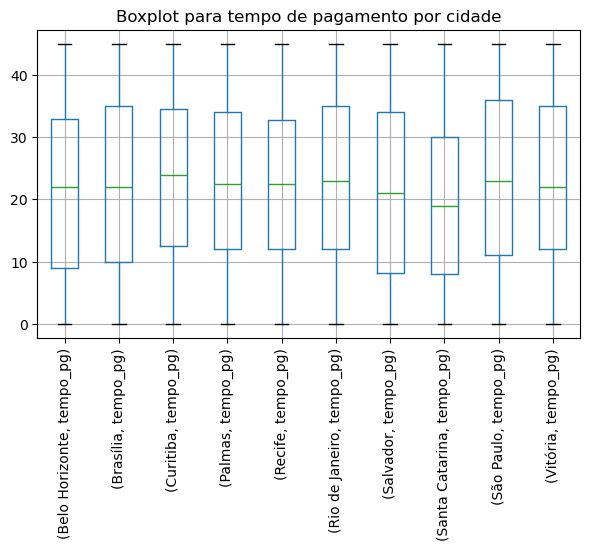

In [37]:
plt.figure(figsize = (7, 4))
df[['loja_cidade','tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation = 90)
plt.show()

In [38]:
#Deu erro, mas mesmo se desse certo não seria o suficiente, por isso o comando de baixo...
#df.groupby('produto_produto').mean().tempo_pg

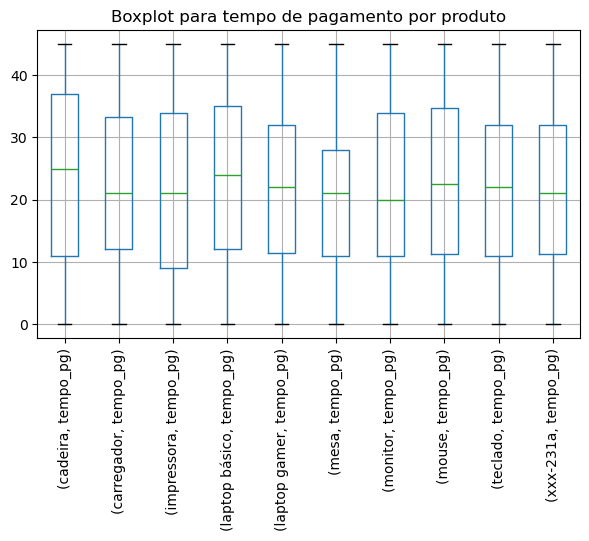

In [39]:
plt.figure(figsize = (7,4))
df[['produto_produto', 'tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por produto')
plt.xticks(rotation = 90)
plt.show()

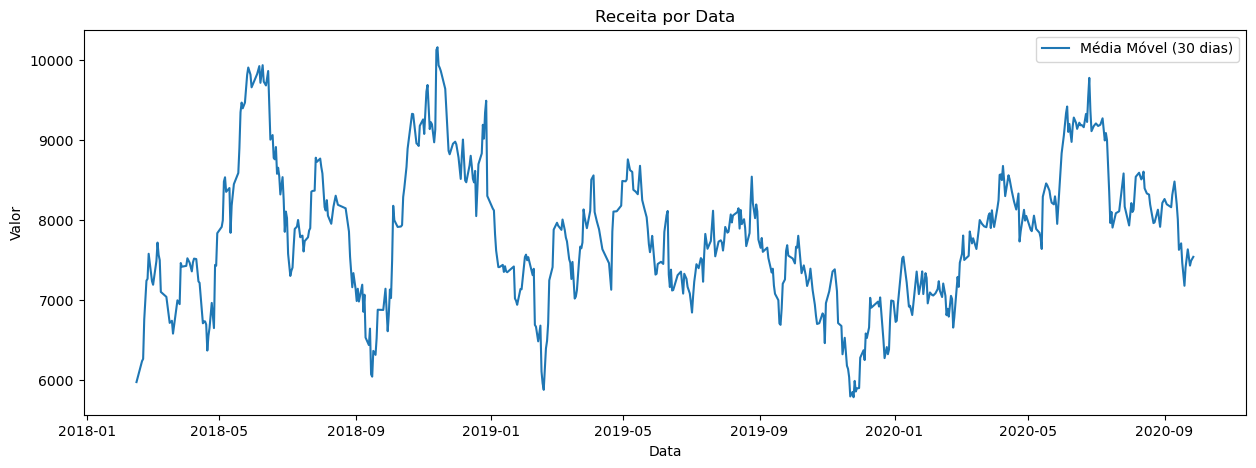

In [40]:
#Exercício1:
# Agrupa por data, soma os valores, e aplica uma média móvel de 30 dias
graf_dados = df[['produto_valor', 'dt_venda']].groupby('dt_venda').sum().rolling(30).mean()

# Plot do gráfico
plt.figure(figsize=(15, 5))
plt.plot(graf_dados.index, graf_dados['produto_valor'], label='Média Móvel (30 dias)')
plt.title('Receita por Data')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [41]:
#Exercício2:
dfPromocao = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")
dfPromocao = dfPromocao.set_index('id_venda')
dfPromocao

,promoção
id_venda,
1,0
2,1
3,1
4,0
5,0
...,...
2996,0
2997,0
2998,0


In [42]:
df = df.join(dfPromocao)

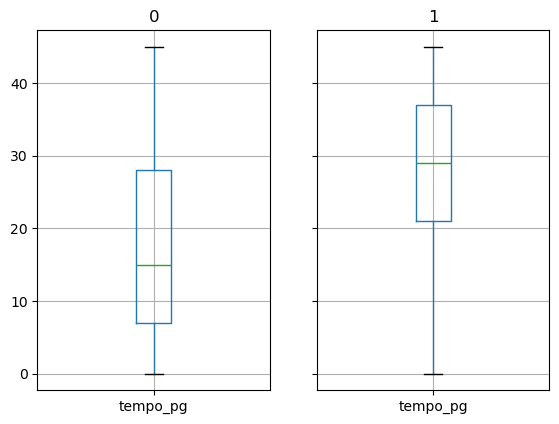

In [43]:
graf_dados = df[['promoção','tempo_pg']][~df.tempo_pg.isnull()]
graf_dados.groupby('promoção').boxplot(column=['tempo_pg'])
plt.show()

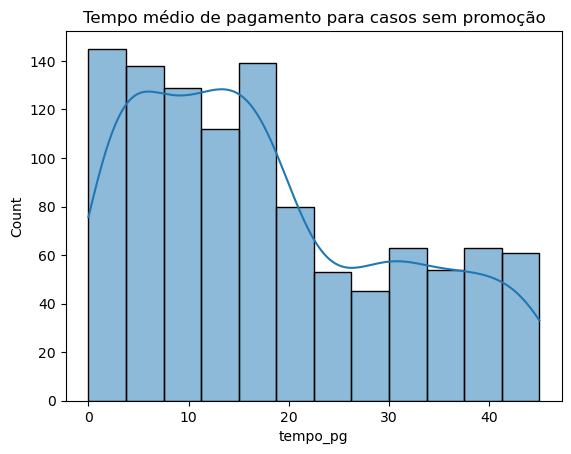

In [44]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==0], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

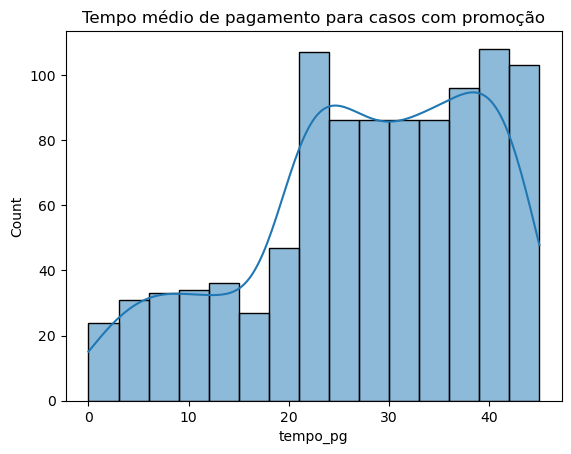

In [81]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos com promoção')
plt.show()